# NAME - DHANYA SRIVASTAVA
 # BATCH - DS2304

## Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 
## Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

## Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3


In [1]:
#IMPORT BASIC LIBRARIES


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
     

In [2]:
#load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
#shape of the dataset
df.shape

(8425, 23)

8425 rows and 23 columns

In [5]:
#All variable names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
#check the datatype of all variables
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
#check Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, 

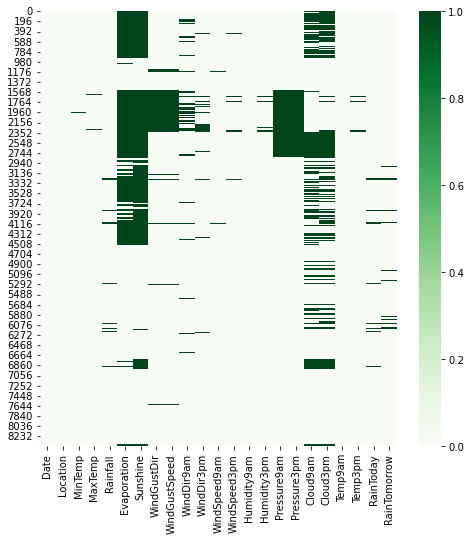

In [8]:
#check the null values using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cmap='Greens');

In [10]:
#count the null values in each variable
df.isnull().sum()
     

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

## Handle Null values

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
int_impute=SimpleImputer(strategy='mean')
object_impute=SimpleImputer(strategy='most_frequent')

In [13]:
list_int=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
          'WindSpeed3pm','Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 
          'Cloud3pm','Temp9am','Temp3pm',]
list_object=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
     

In [14]:
for x in list_int:
    df[x]=int_impute.fit_transform(df[x].values.reshape(-1,1))
for x in list_object:
    df[x]=object_impute.fit_transform(df[x].values.reshape(-1,1))

In [15]:
#check the null values after applying SimpleImputer
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
#information of dataset
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

Observations:-

RangeIndex: 8425 entries, 0 to 8424

Data columns (total 23 columns)

There is no null values in dataset

dtypes: float64(16), object(7)

memory usage: 1.5+ MB

In [17]:
#counting uniques of all variables
df.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

## More Details about Dataset

In [18]:
#check the unique of variable
print(df['Location'].unique())
print(df['Location'].value_counts())

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


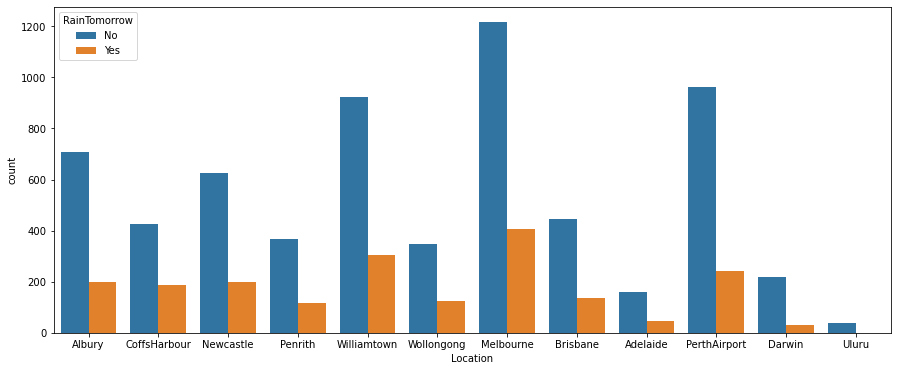

In [19]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['Location'],hue=df['RainTomorrow']);

In [20]:
#check the unique of variable
print(df['WindGustDir'].unique())
print(df['WindGustDir'].value_counts())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


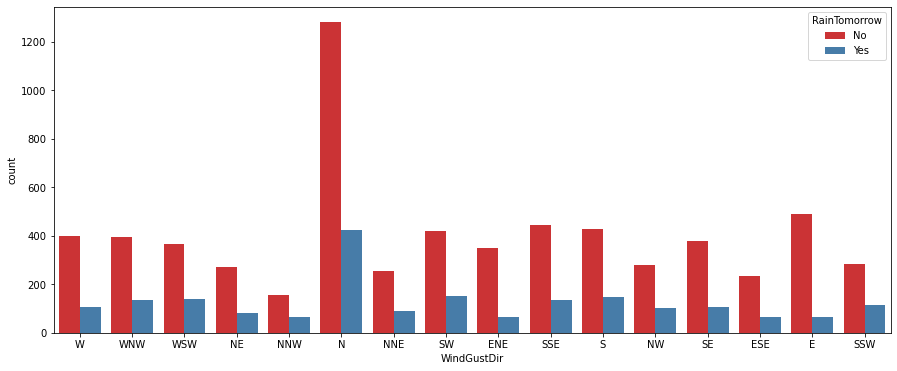

In [21]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'],palette='Set1');

In [22]:
#check the unique of variable
print(df['WindDir9am'].unique())
print(df['WindDir9am'].value_counts())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


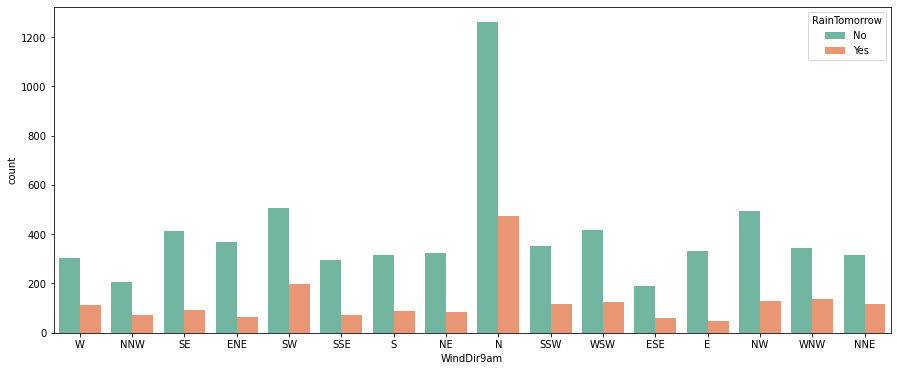

In [23]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'],palette='Set2');

In [24]:
#check the unique of variable
print(df['WindDir3pm'].unique())
print(df['WindDir3pm'].value_counts())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


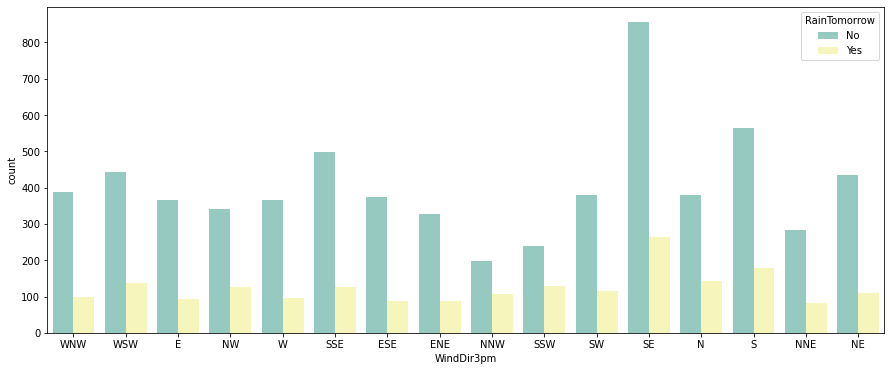

In [25]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'],palette='Set3');
     

In [26]:
#check the unique of variable
print(df['RainToday'].unique())
print(df['RainToday'].value_counts())

['No' 'Yes']
No     6435
Yes    1990
Name: RainToday, dtype: int64


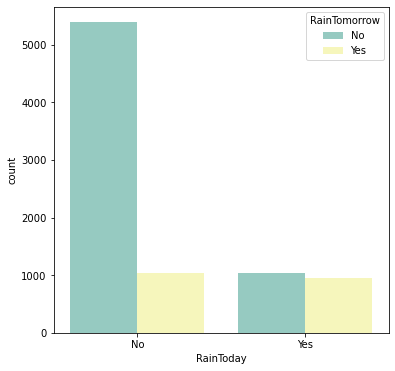

In [27]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(df['RainToday'],hue=df['RainTomorrow'],palette='Set3');

In [28]:
#check the unique of variable
print(df['RainTomorrow'].unique())
print(df['RainTomorrow'].value_counts())

['No' 'Yes']
No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


In [29]:
df['RainTomorrow']=df['RainTomorrow'].replace('Yes',1)
df['RainTomorrow']=df['RainTomorrow'].replace('No',0)
     

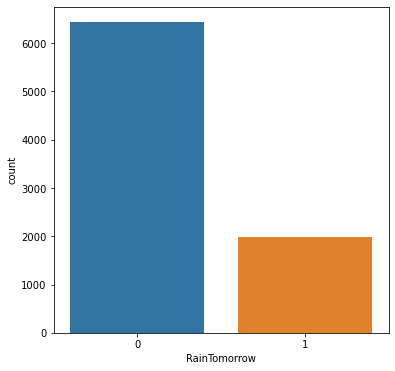

In [30]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(df['RainTomorrow']);

In [31]:
#describe dataset
df.describe().T

count         mean        std    min          25%  \
MinTemp        8425.0    13.193305   5.379488   -2.0     9.300000   
MaxTemp        8425.0    23.859976   6.114516    8.2    19.300000   
Rainfall       8425.0     2.805913  10.309308    0.0     0.000000   
Evaporation    8425.0     5.389395   3.852004    0.0     4.000000   
Sunshine       8425.0     7.632205   2.825451    0.0     7.632205   
WindGustSpeed  8425.0    40.174469  13.776101    7.0    31.000000   
WindSpeed9am   8425.0    13.847646  10.128579    0.0     6.000000   
WindSpeed3pm   8425.0    18.533662   9.704759    0.0    11.000000   
Humidity9am    8425.0    67.822496  16.774231   10.0    56.000000   
Humidity3pm    8425.0    51.249790  18.311894    6.0    39.000000   
Pressure9am    8425.0  1017.640233   6.275759  989.8  1014.000000   
Pressure3pm    8425.0  1015.236075   6.217451  982.9  1011.400000   
Cloud9am       8425.0     4.566622   2.429205    0.0     3.000000   
Cloud3pm       8425.0     4.503183   2.299419    0.0     3.000000   
Temp9am        8425.0    17.762015   5.608301    1.9    13.800000   
Temp3pm        8425.0    22.442934   5.945849    7.3    18.100000   
RainTomorrow   8425.0     0.236320   0.424846    0.0     0.000000   

                       50%          75%     max  
MinTemp          13.200000    17.300000    28.5  
MaxTemp          23.300000    28.000000    45.5  
Rainfall          0.000000     1.400000   371.0  
Evaporation       5.389395     5.389395   145.0  
Sunshine          7.632205     8.900000    13.9  
WindGustSpeed    40.174469    48.000000   107.0  
WindSpeed9am     13.000000    20.000000    63.0  
WindSpeed3pm     19.000000    24.000000    83.0  
Humidity9am      68.000000    80.000000   100.0  
Humidity3pm      51.000000    63.000000    99.0  
Pressure9am    1017.640233  1021.300000  1039.0  
Pressure3pm    1015.236075  1018.800000  1036.0  
Cloud9am          4.566622     7.000000     8.0  
Cloud3pm          4.503183     7.000000     8.0  
Temp9am          17.762015    21.900000    39.4  
Temp3pm          22.000000    26.300000    44.1  
RainTomorrow      0.000000     0.000000     1.0

## Apply Label Encoder

In [32]:
df1=df.copy()#copy the dataset
x=df1.drop('RainTomorrow',axis=1)
y=df1['RainTomorrow']

In [33]:
from sklearn.preprocessing import LabelEncoder
x=x.apply(LabelEncoder().fit_transform)

In [34]:
df1=x #make dataframe and add target variable
df1['RainTomorrow']=y

In [35]:
df1.head()#display dataset

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1      150      134         5           28        77   
1     1         1       89      157         0           28        77   
2     2         1      144      163         0           28        77   
3     3         1      107      186         0           28        77   
4     4         1      191      229         8           28        77   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0           13             21          13          14            12   
1           14             21           6          15             2   
2           15             22          13          15            11   
3            4              9           9           0             6   
4           13             19           1           7             4   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0            14           61           16           90          103         9   
1            13           33           19          119          110         5   
2            15           27           24           89          119         5   
3             5           34           10          189          160         5   
4            12           72           27          121           92         8   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0         5      145      134          0             0  
1         5      148      160          0             0  
2         2      187      149          0             0  
3         5      158      182          0             0  
4         9      155      214          0             0

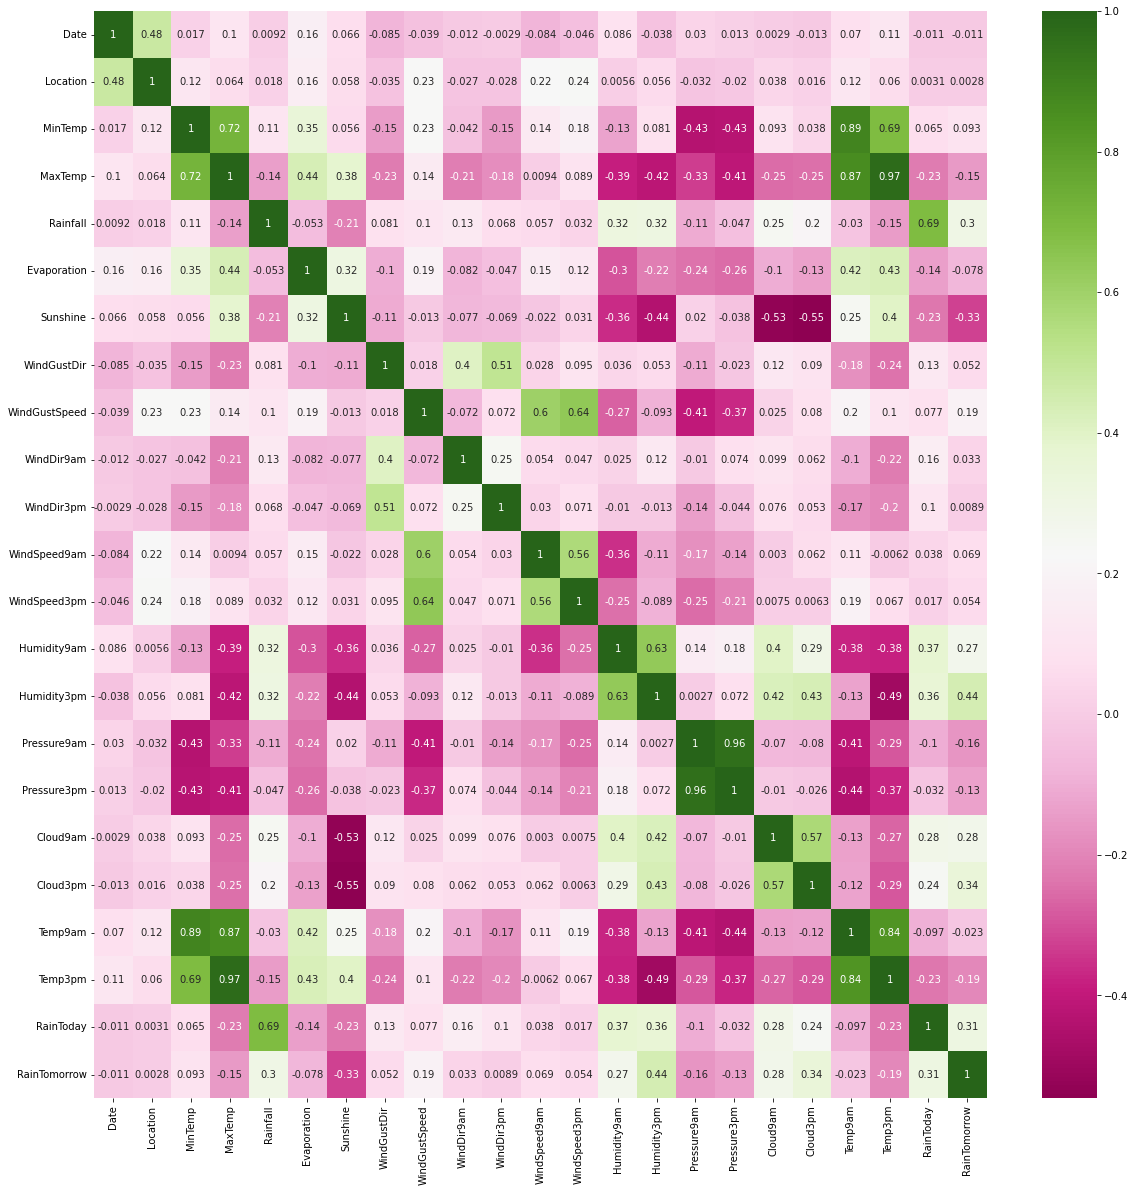

In [36]:
#checking correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='PiYG');

In [37]:
#check correlation with each other
df1.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.475037  0.016757  0.102200  0.009158     0.161837   
Location       0.475037  1.000000  0.116680  0.063546  0.018164     0.160332   
MinTemp        0.016757  0.116680  1.000000  0.718592  0.105315     0.350090   
MaxTemp        0.102200  0.063546  0.718592  1.000000 -0.139788     0.437565   
Rainfall       0.009158  0.018164  0.105315 -0.139788  1.000000    -0.053460   
Evaporation    0.161837  0.160332  0.350090  0.437565 -0.053460     1.000000   
Sunshine       0.065733  0.057771  0.056010  0.379037 -0.210424     0.316196   
WindGustDir   -0.084552 -0.035408 -0.145701 -0.225477  0.081221    -0.103835   
WindGustSpeed -0.039276  0.231501  0.230027  0.138626  0.102154     0.188847   
WindDir9am    -0.012369 -0.027103 -0.041941 -0.214861  0.131358    -0.082053   
WindDir3pm    -0.002895 -0.027736 -0.147805 -0.181857  0.067595    -0.046839   
WindSpeed9am  -0.083774  0.223398  0.135848  0.009424  0.057465     0.146507   
WindSpeed3pm  -0.046043  0.235268  0.180769  0.089045  0.032475     0.123810   
Humidity9am    0.086080  0.005638 -0.129359 -0.389065  0.318877    -0.296954   
Humidity3pm   -0.038106  0.055915  0.080576 -0.419233  0.315005    -0.219242   
Pressure9am    0.029876 -0.032385 -0.432260 -0.329444 -0.106416    -0.243377   
Pressure3pm    0.013289 -0.020237 -0.426269 -0.407924 -0.046501    -0.255824   
Cloud9am       0.002934  0.037542  0.093438 -0.251424  0.250101    -0.100585   
Cloud3pm      -0.013024  0.016119  0.038074 -0.248098  0.203319    -0.133361   
Temp9am        0.070465  0.117723  0.887402  0.866834 -0.030015     0.416408   
Temp3pm        0.113730  0.060170  0.686593  0.974567 -0.147067     0.426255   
RainToday     -0.011365  0.003071  0.064838 -0.225181  0.686172    -0.140285   
RainTomorrow  -0.011228  0.002824  0.092922 -0.152943  0.295745    -0.078041   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Date           0.065733    -0.084552      -0.039276   -0.012369   -0.002895   
Location       0.057771    -0.035408       0.231501   -0.027103   -0.027736   
MinTemp        0.056010    -0.145701       0.230027   -0.041941   -0.147805   
MaxTemp        0.379037    -0.225477       0.138626   -0.214861   -0.181857   
Rainfall      -0.210424     0.081221       0.102154    0.131358    0.067595   
Evaporation    0.316196    -0.103835       0.188847   -0.082053   -0.046839   
Sunshine       1.000000    -0.106173      -0.013310   -0.076650   -0.068775   
WindGustDir   -0.106173     1.000000       0.018140    0.403562    0.505799   
WindGustSpeed -0.013310     0.018140       1.000000   -0.071561    0.071703   
WindDir9am    -0.076650     0.403562      -0.071561    1.000000    0.249527   
WindDir3pm    -0.068775     0.505799       0.071703    0.249527    1.000000   
WindSpeed9am  -0.021564     0.027915       0.602591    0.054401    0.030019   
WindSpeed3pm   0.030868     0.094911       0.640484    0.047275    0.070949   
Humidity9am   -0.361136     0.035730      -0.269905    0.024917   -0.010448   
Humidity3pm   -0.440455     0.052549      -0.092702    0.124468   -0.012982   
Pressure9am    0.020112    -0.108534      -0.405308   -0.010415   -0.136070   
Pressure3pm   -0.038393    -0.023267      -0.369593    0.073987   -0.043546   
Cloud9am      -0.533121     0.120274       0.025188    0.098617    0.076394   
Cloud3pm      -0.546233     0.089615       0.079771    0.062000    0.053187   
Temp9am        0.250462    -0.177180       0.200850   -0.103552   -0.166295   
Temp3pm        0.396063    -0.239685       0.101090   -0.222360   -0.195519   
RainToday     -0.234619     0.125188       0.076915    0.157324    0.100125   
RainTomorrow  -0.327982     0.051832       0.190116    0.032860    0.008918   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Date              -0.083774     -0.046043     0.086080    -0.038106   
Location           0.223398      0.235268     0.005638     

Observations:-
    
Date variable is Positive correlation with Location variable

Maximum Temperture variable is high positive correlation with Minimum Temperture variable

Temp9am and Temp3pm high Positive correlation with Minimum and Maximum Temperture Variables

Rain day is High Positive correlation with Rainfall variable

Cloud9am and Cloud3pm High Negative correlation with Sunshine variable

WindSpeed9am and WindSpeed3pm variables are High Positive correlation with WindGustSpeed variable

Pressure9am and Pressure3pm High Negative correlation with Minimum Temperture

Pressure9am and Pressure3pm High Negative correlation with WindGustSpeed variable

Humidity9am is High Positive correlation with the Humidity3pm variable

Pressure9am and Pressure3pm High Positive Correlation with Each other

Cloud9am and Cloud9am variables are High Positive correlations with Each other

Temp9am and Temp9am are High Positive Correlation with Each Other

WindSpeed9am and WindSpeed3pm variables are High Positive Correlation with each other

Cloud9am and Cloud9am variables are High Positive correlations with Humidity9am and Humidity3pm

Temp9am and Temp9am are High Negative Correlation with Humidity9am and Humidity3pm Also Pressure9am and Pressure3pm


## Target Variable Correlation

In [38]:
df_target=df1.corr()#correlation of dataset
df_target['RainTomorrow'].sort_values(ascending=False)#target variable correlation with other variables

RainTomorrow     1.000000
Humidity3pm      0.444154
Cloud3pm         0.341869
RainToday        0.312929
Rainfall         0.295745
Cloud9am         0.277451
Humidity9am      0.271543
WindGustSpeed    0.190116
MinTemp          0.092922
WindSpeed9am     0.069317
WindSpeed3pm     0.054107
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Date            -0.011228
Temp9am         -0.023154
Evaporation     -0.078041
Pressure3pm     -0.133168
MaxTemp         -0.152943
Pressure9am     -0.162720
Temp3pm         -0.193915
Sunshine        -0.327982
Name: RainTomorrow, dtype: float64

## Scatter Plot

In [39]:
sns.set_theme()

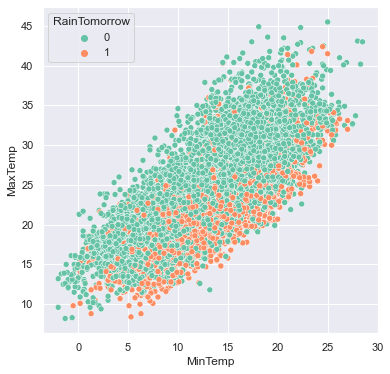

In [40]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','MaxTemp',hue='RainTomorrow',data=df,palette='Set2');
     

 Minimum Temperture will increase when maximum temperture increase

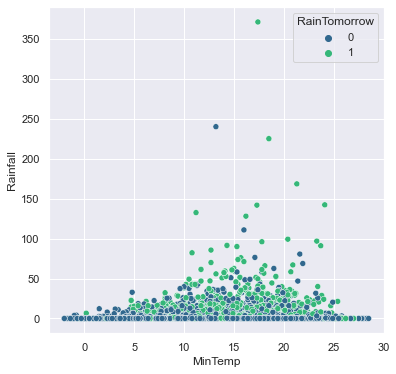

In [41]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','Rainfall',hue='RainTomorrow',data=df,palette='viridis');

 If the minimum temperture b/w 5 to 25 there is a chance of high Rainfall

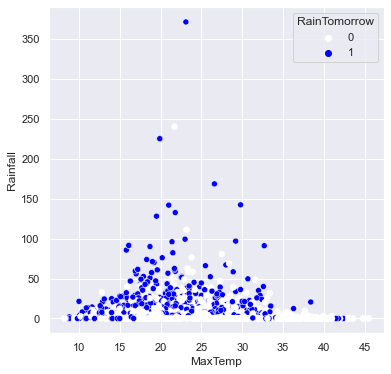

In [42]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MaxTemp','Rainfall',hue='RainTomorrow',data=df,palette='flag');

when temperture b/w 35 to 45 there is no chance of high Rainfall

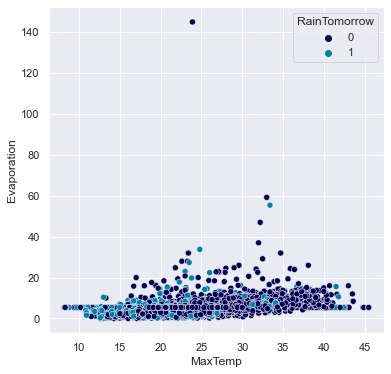

In [43]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MaxTemp','Evaporation',hue='RainTomorrow',data=df,palette='ocean');

when Evaporation increase when Maximum Tempertrue increase . There is a little bit Evaporation high in high temperture

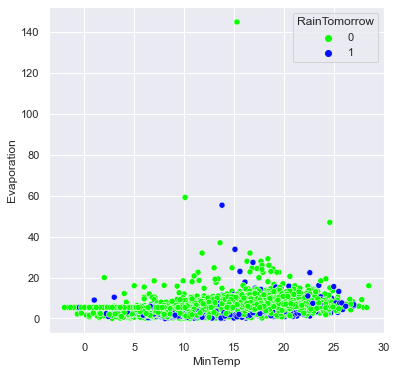

In [44]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','Evaporation',hue='RainTomorrow',data=df,palette='hsv');

If you observe here very fine amount of Evaporation increase when minimum temperture increase

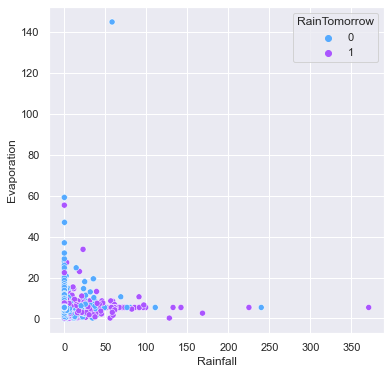

In [45]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('Rainfall','Evaporation',hue='RainTomorrow',data=df,palette='cool');

If you observe Evaporation here , 0 Rainfall have high Evaporation. if Rainfall increase there is Evaporation is constant b/w 0 to 20

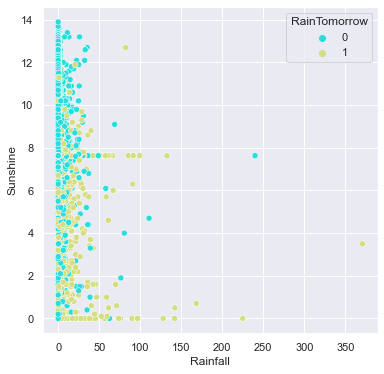

In [47]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('Rainfall','Sunshine',hue='RainTomorrow',data=df,palette='rainbow');
     

If you observe here Maximum Sunshine point in 0 Rainfall. Maximum Sunshine points have in b/w 0 to 50 Rainfall

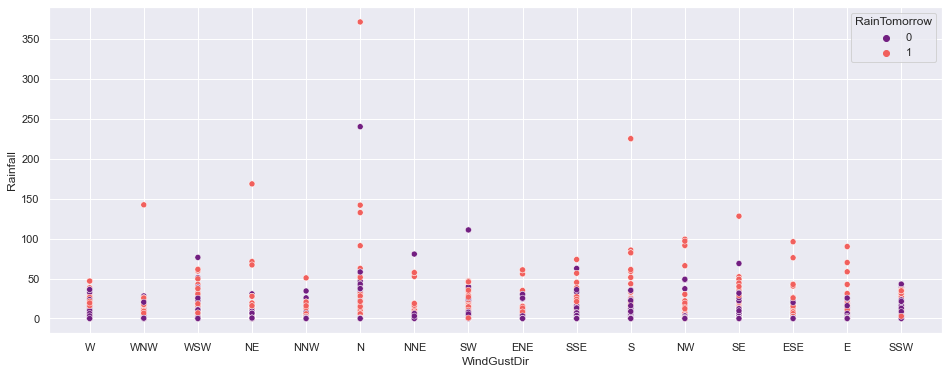

In [48]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindGustDir','Rainfall',hue='RainTomorrow',data=df,palette='magma');

The North direction of the strongest wind gust and North direction wind gust have Maximum Rainfall and West-North-West(WNW) has low Rainfall.

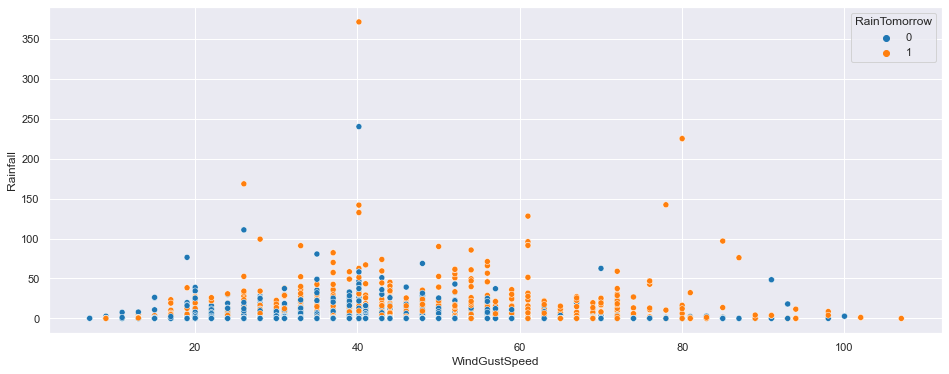

In [49]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindGustSpeed','Rainfall',hue='RainTomorrow',data=df,palette='tab10');

The speed (km/h) of the strongest wind gust in b/w 30 to 60 have High Rainfall and as well as chance of Rain in b/w 30 to 70 wind speed.

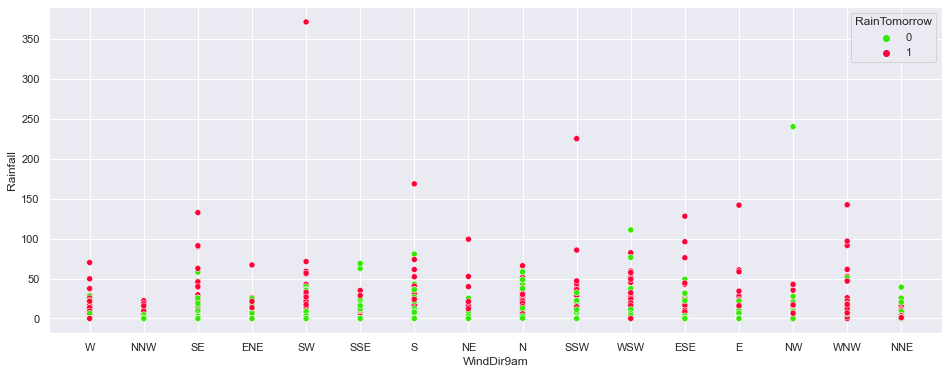

In [50]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindDir9am','Rainfall',hue='RainTomorrow',data=df,palette='prism');

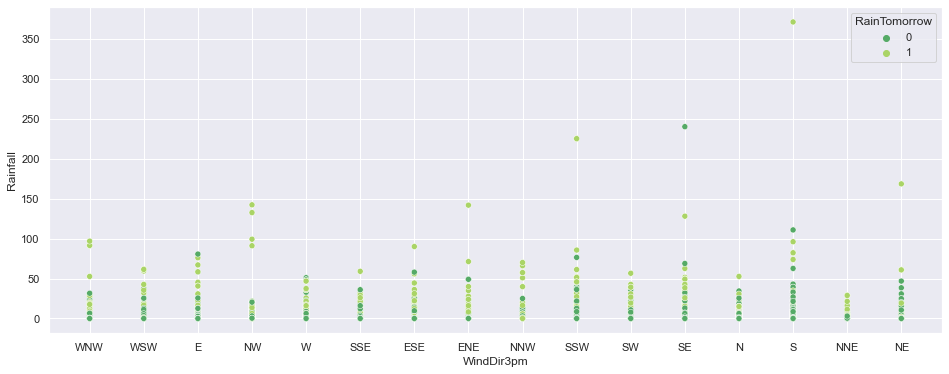

In [51]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindDir3pm','Rainfall',hue='RainTomorrow',data=df,palette='summer');

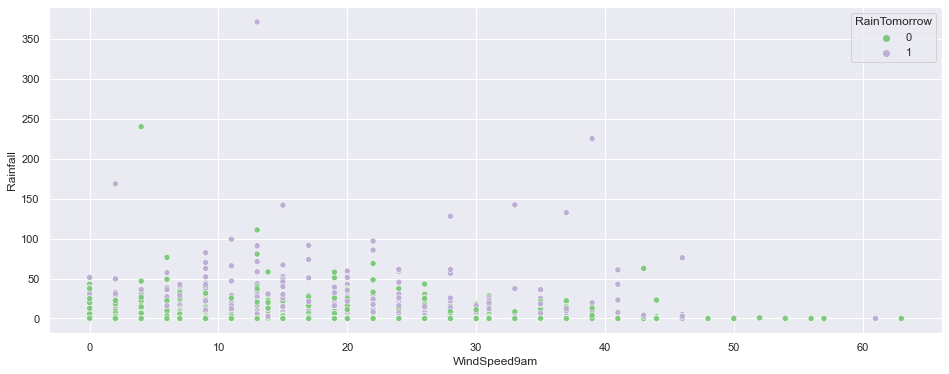

In [52]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindSpeed9am','Rainfall',hue='RainTomorrow',data=df,palette='Accent');

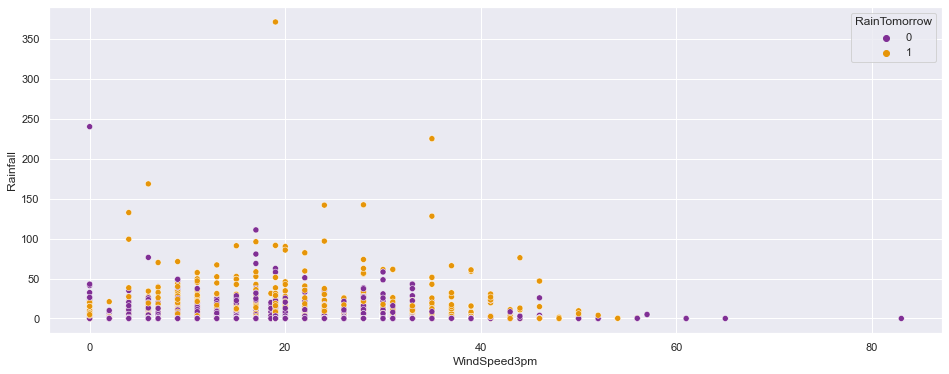

In [53]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindSpeed3pm','Rainfall',hue='RainTomorrow',data=df,palette='CMRmap');

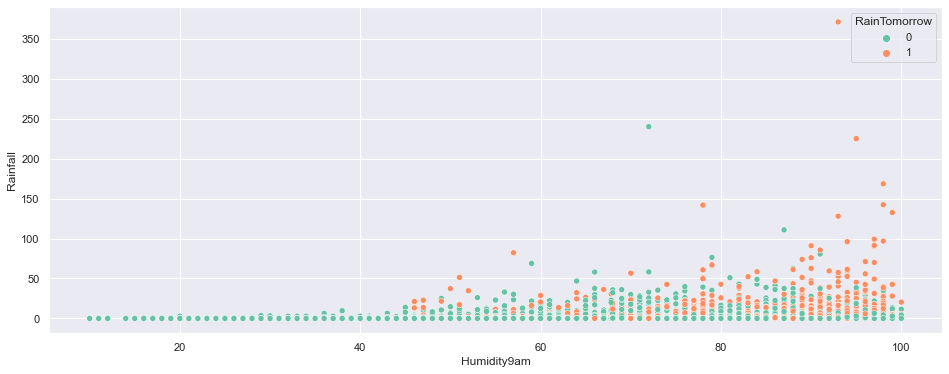

In [54]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Humidity9am','Rainfall',hue='RainTomorrow',data=df,palette='Set2');

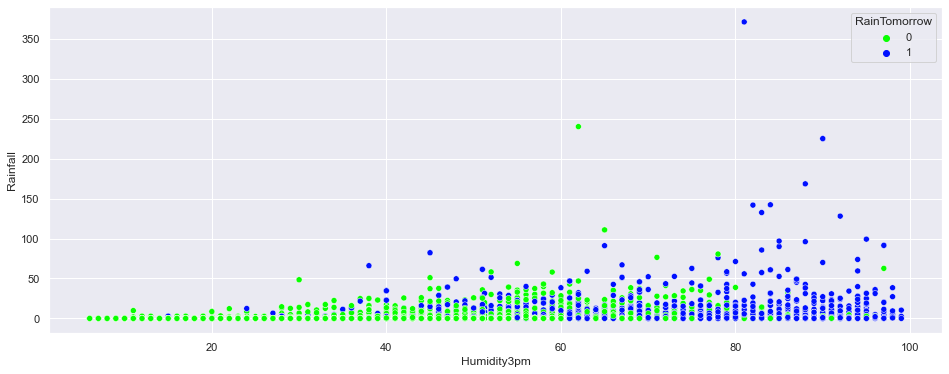

In [55]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Humidity3pm','Rainfall',hue='RainTomorrow',data=df,palette='hsv');

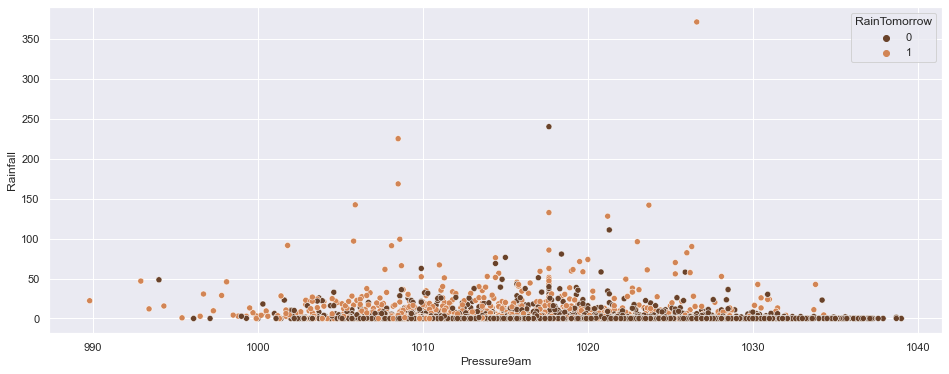

In [56]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Pressure9am','Rainfall',hue='RainTomorrow',data=df,palette='copper');

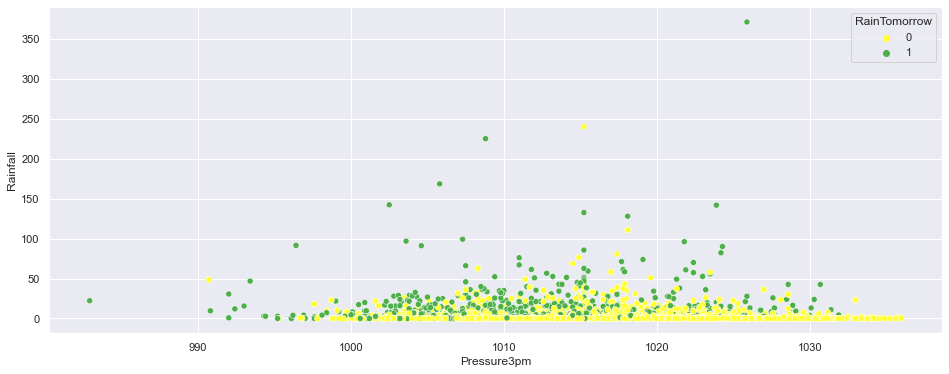

In [57]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Pressure3pm','Rainfall',hue='RainTomorrow',data=df,palette='Set1_r');
     

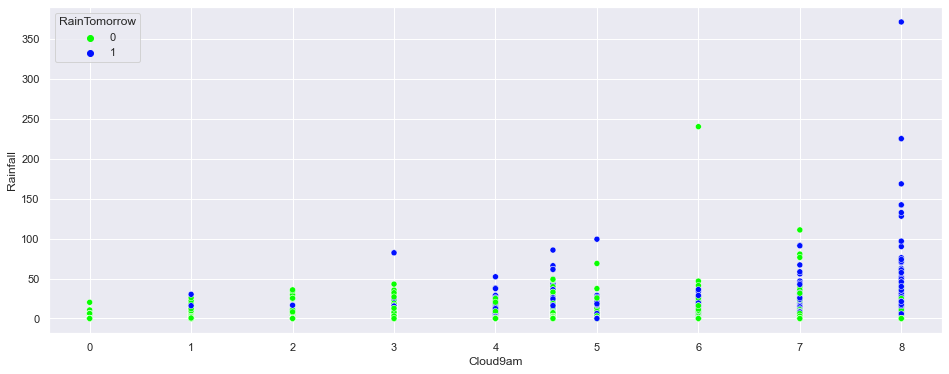

In [58]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Cloud9am','Rainfall',hue='RainTomorrow',data=df,palette='hsv');

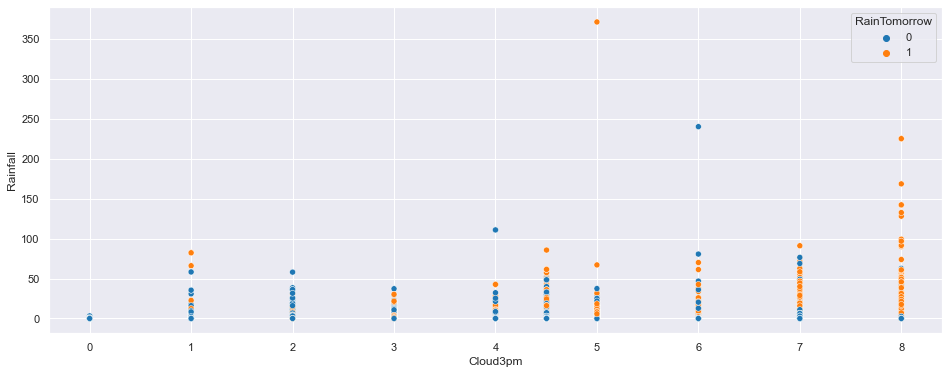

In [59]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Cloud3pm','Rainfall',hue='RainTomorrow',data=df,palette='tab10');
     

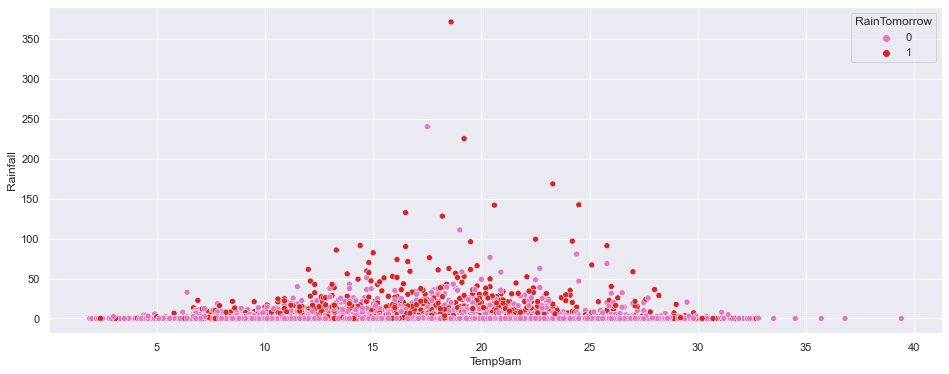

In [60]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Temp9am','Rainfall',hue='RainTomorrow',data=df,palette='tab10_r');
     

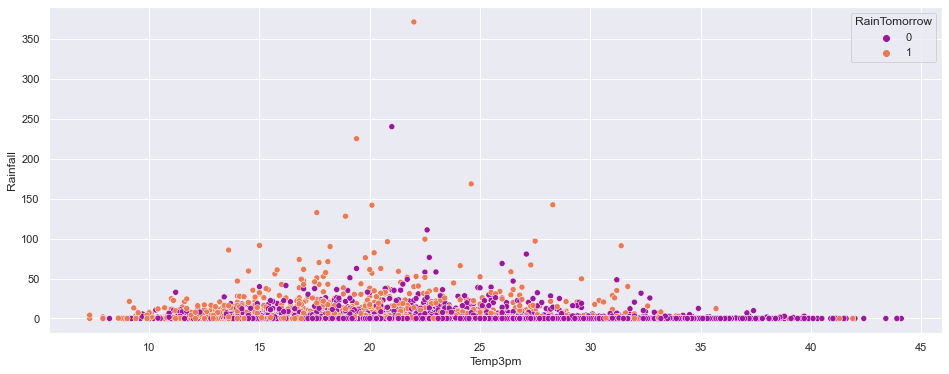

In [61]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Temp3pm','Rainfall',hue='RainTomorrow',data=df,palette='plasma');

## Pair Plot

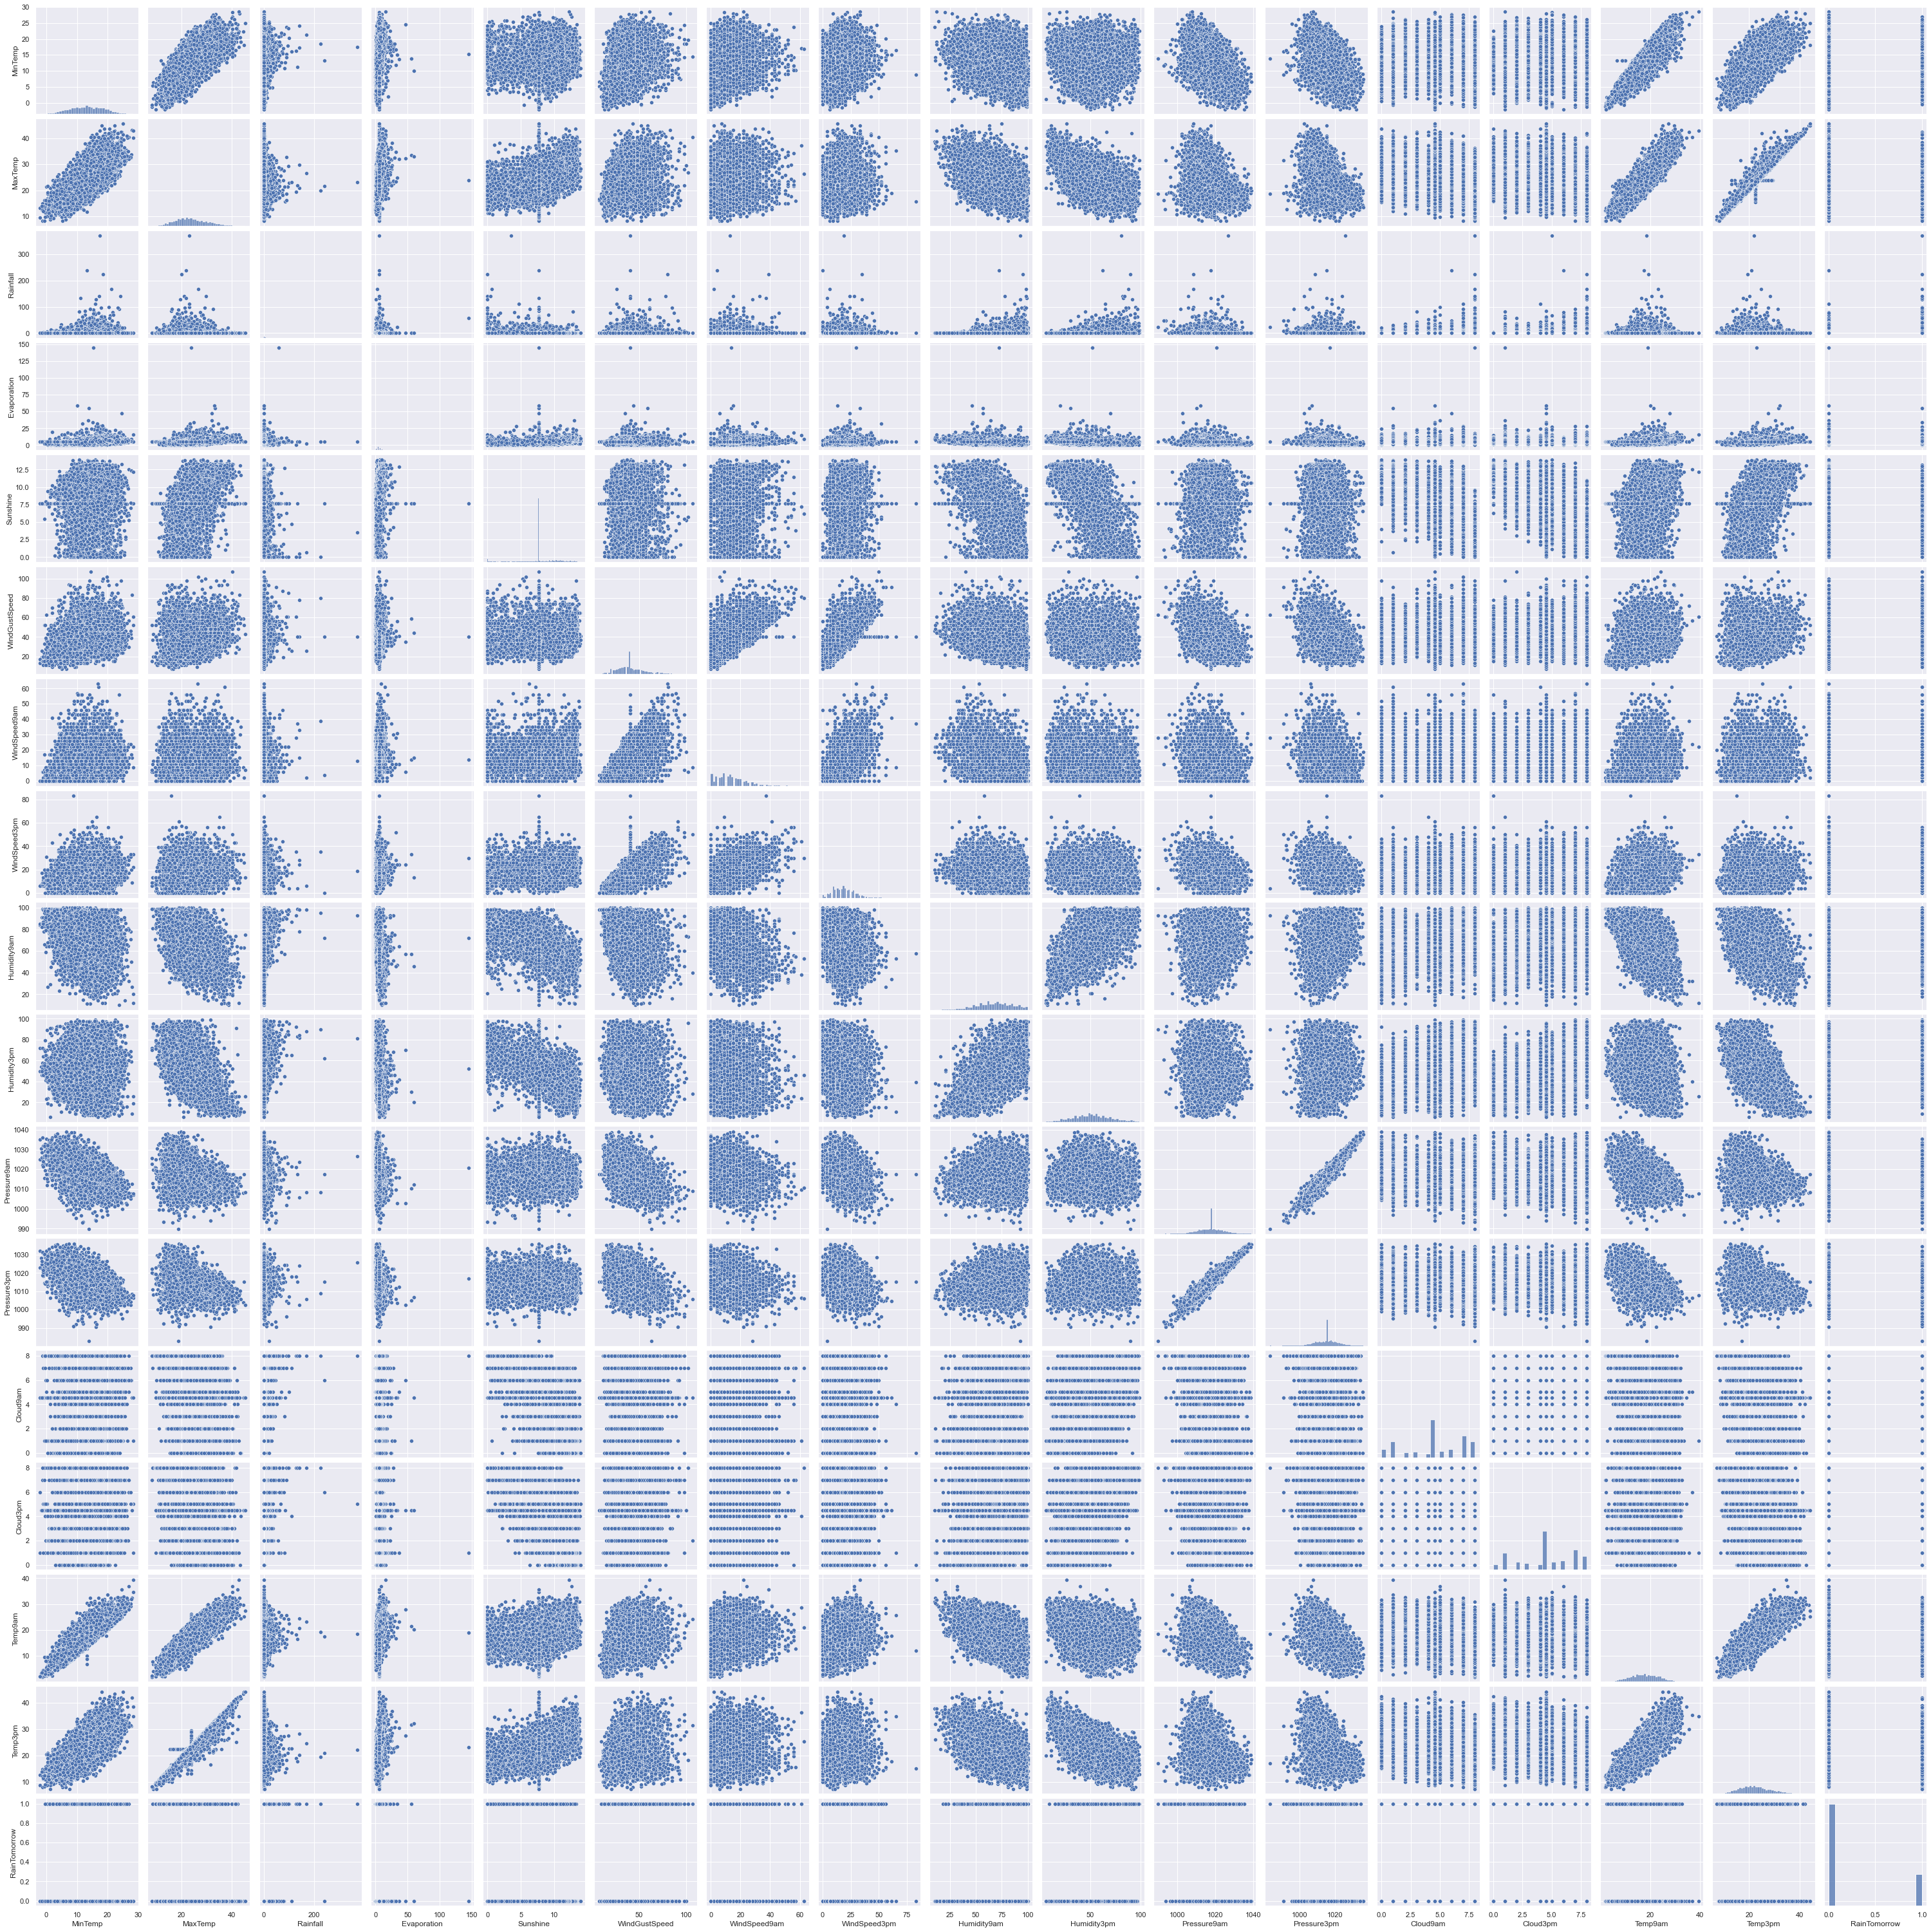

In [62]:
sns.pairplot(df)

## Apply SMOTE

In [63]:
#Apply SMOTE because dataset is imbalanced to make Balanced apply SMOTE
from imblearn.over_sampling import SMOTE

In [64]:
smt=SMOTE()

In [65]:
dfx=df1.drop('RainTomorrow',axis=1)
dfy=df1['RainTomorrow']

In [66]:
train_x,train_y=smt.fit_resample(dfx,dfy)
     

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

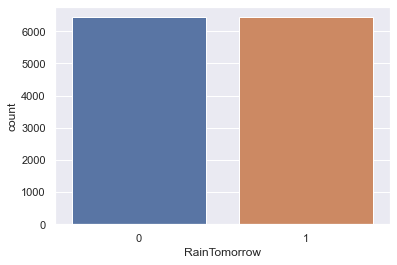

In [67]:
#count plot of target variable
sns.countplot(train_y)
     

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

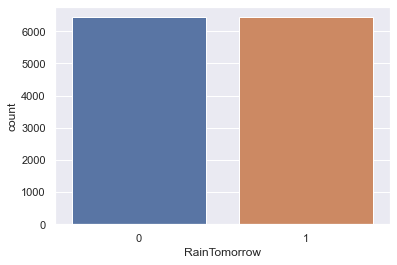

In [68]:
#count plot of target variable
sns.countplot(train_y)
     

In [69]:
#Shape of the Dataset After applying SMOTE 
df1.shape

(8425, 23)

## Check the outliers

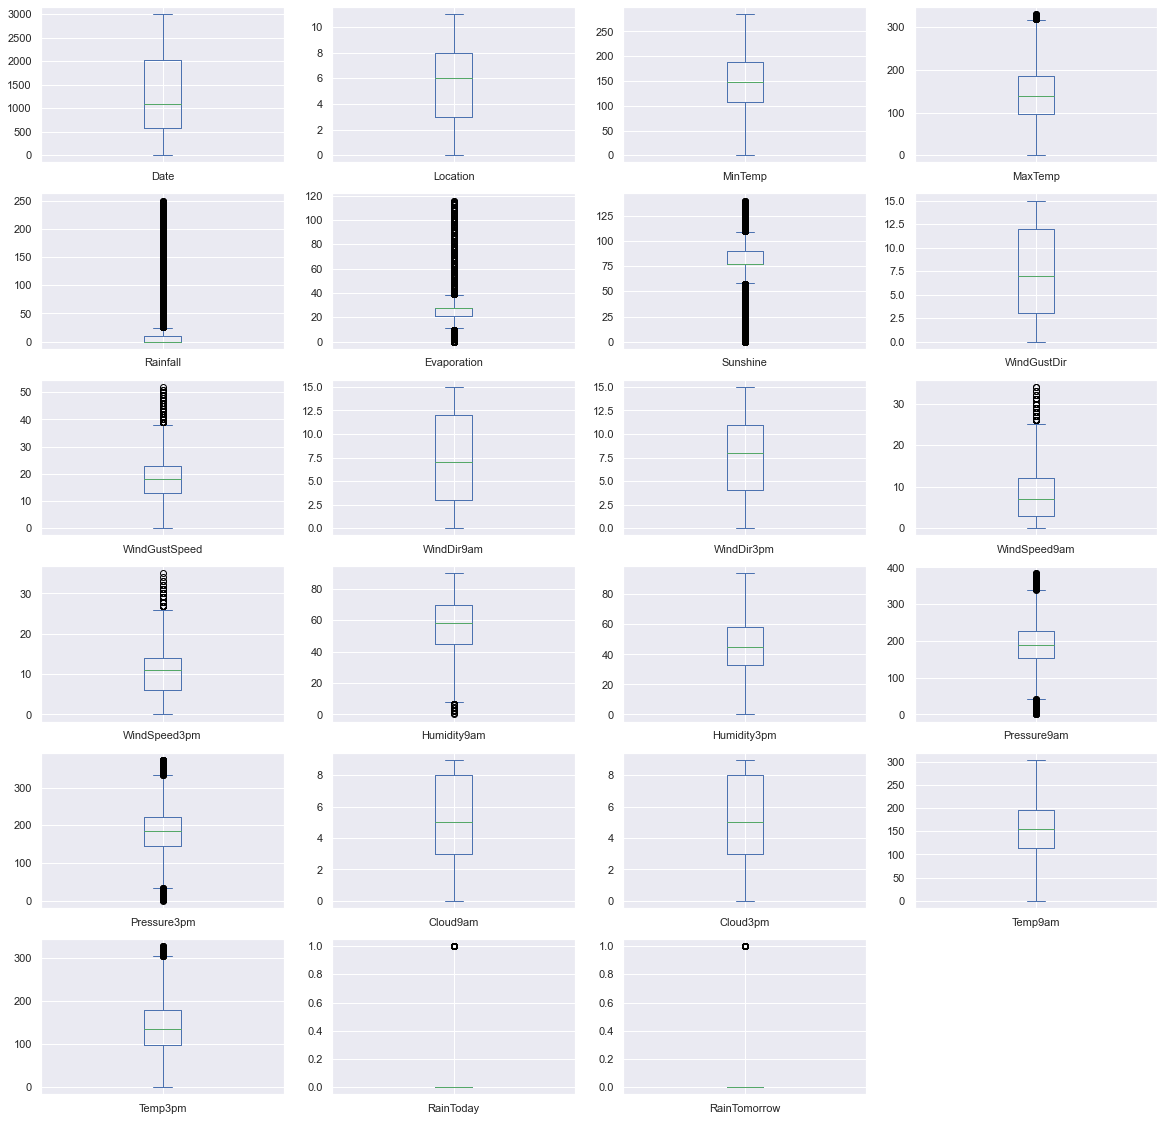

In [70]:
#check the outliers using boxplot
df1.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

In [71]:
#removing outliers
from scipy.stats import zscore

In [72]:
z=np.abs(zscore(df1))

In [73]:
threshold=3
print(np.where(z>3))
     

(array([  44,   52,   61,   62,   62,   67,   68,   68,  123,  267,  296,
        356,  381,  381,  431,  462,  544,  563,  568,  568,  642,  648,
        683,  683,  684,  699,  713,  738,  770,  796,  797,  802,  803,
        907,  928,  935,  949,  951,  979,  980,  980,  980, 1008, 1009,
       1011, 1138, 1148, 1149, 1151, 1187, 1189, 1202, 1203, 1237, 1241,
       1264, 1265, 1275, 1357, 1358, 1411, 1412, 1413, 1479, 1480, 1481,
       1487, 1501, 1513, 1514, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
       1692, 1774, 1782, 1783, 1811, 1819, 1829, 1841, 1873, 1881, 1898,
       1903, 1945, 1952, 1954, 2016, 2028, 2033, 2043, 2063, 2074, 2083,
       2108, 2116, 2182, 2183, 2186, 2201, 2211, 2219, 2219, 2230, 2231,
       2265, 2429, 2488, 2500, 2505, 2510, 2527, 2527, 2541, 2576, 2577,
       2593, 2659, 2676, 2677, 2678, 2735, 2802, 2827, 2827, 2835, 2841,
       2849, 2849, 2855, 2863, 2869, 2877, 2883, 2885, 2886, 2890, 2891,
       2897, 2898, 2899, 2900, 2901, 2905, 2909, 2

In [74]:
#removing outliers
df1=df1[(z<3).all(axis=1)]
     

In [75]:
#shape of the dataset after removing outliers
df1.shape

(7861, 23)

## Checking Skewness

In [76]:
x=df1.drop('RainTomorrow',axis=1)#independent variables
y=df1['RainTomorrow']#target variable

In [77]:
#checking shape of independent variables
x.shape

(7861, 22)

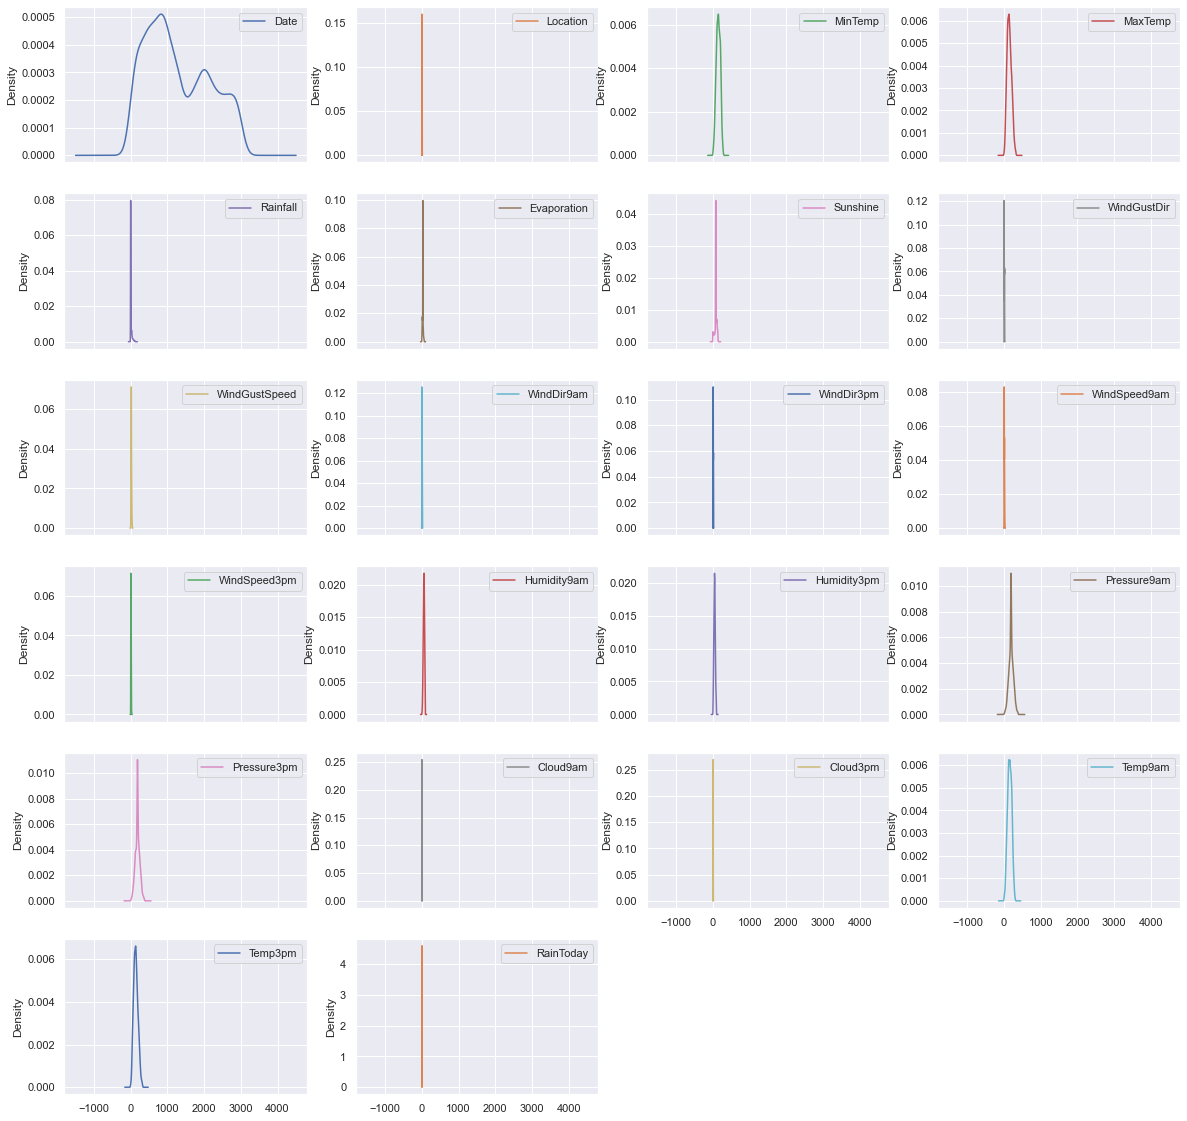

In [78]:
x.plot(kind='density',subplots=True,layout=(6,4),figsize=(20,20));
     

In [79]:
#checking skewness
x.skew().sort_values(ascending=False)

Rainfall         2.696032
RainToday        1.392427
WindSpeed9am     0.660349
Evaporation      0.501423
WindGustSpeed    0.486924
Date             0.399825
Temp3pm          0.337952
MaxTemp          0.320970
WindSpeed3pm     0.288646
WindDir9am       0.174963
Humidity3pm      0.115841
WindGustDir      0.114517
Pressure3pm      0.054293
Pressure9am      0.043850
Temp9am         -0.028122
Location        -0.037036
MinTemp         -0.068748
WindDir3pm      -0.120406
Humidity9am     -0.217344
Cloud3pm        -0.233454
Cloud9am        -0.294674
Sunshine        -0.720778
dtype: float64

In [80]:
#removing skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [81]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [82]:
data=pipe.fit_transform(x)

In [83]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [84]:
#Sunshine variable is Highly Negative correlation with Target variable so drop Sunshine variable
x.drop('Sunshine',axis=1,inplace=True)

## VIF(Variance Inflation Factor)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
     

In [86]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [87]:
vif()

Variables  VIF Factor
0            Date    1.420550
1        Location    1.488469
2         MinTemp    8.495750
3         MaxTemp   26.845684
4        Rainfall    4.936264
5     Evaporation    1.436749
6     WindGustDir    1.616923
7   WindGustSpeed    2.280041
8      WindDir9am    1.333512
9      WindDir3pm    1.486748
10   WindSpeed9am    2.004653
11   WindSpeed3pm    2.006410
12    Humidity9am    3.941794
13    Humidity3pm    5.226775
14    Pressure9am   20.493412
15    Pressure3pm   19.456674
16       Cloud9am    1.755152
17       Cloud3pm    1.613988
18        Temp9am   17.738484
19        Temp3pm   33.366136
20      RainToday    4.529775

In [88]:
#Cloud9am and Cloud3pm are Same VIF Factor
x.drop('Cloud9am',axis=1,inplace=True)
#WindSpeed3pm and WindSpeed9am as same VIF Factor
x.drop('WindSpeed9am',axis=1,inplace=True)
#WindDir9am and WindDir3pm are same VIF Factor
x.drop('WindDir3pm',axis=1,inplace=True)
#Location and Date variables as same VIF Factor
x.drop('Location',axis=1,inplace=True)
#Evaporation and WindGustDir are Same vif Factor
x.drop('Evaporation',axis=1,inplace=True)
     

## Standard Scaler

In [89]:
scale=MinMaxScaler()

In [90]:
#make data in standard scale
x=scale.fit_transform(x)

## Model selection

In [91]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve

In [92]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [93]:
model_list=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

## LogisticRegression

In [94]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [95]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.845518118245391 Maximum Random Number:- 52


accuracy_score:- 0.8359821996185632
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1378
           1       0.41      0.75      0.53       195

    accuracy                           0.84      1573
   macro avg       0.69      0.80      0.72      1573
weighted avg       0.89      0.84      0.85      1573



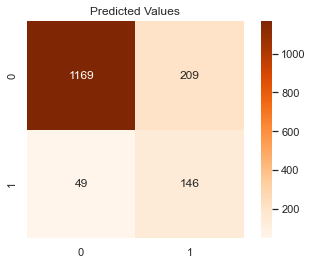

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=13)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

## GaussianNB

In [97]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Greens',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [98]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8073744437380801 Maximum Random Number:- 30


accuracy_score:- 0.7813095994914177
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1152
           1       0.61      0.49      0.54       421

    accuracy                           0.78      1573
   macro avg       0.72      0.69      0.70      1573
weighted avg       0.77      0.78      0.77      1573



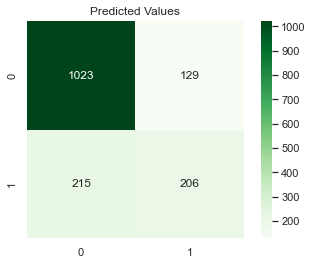

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

## DecisionTreeClassifier

In [100]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Blues',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [101]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8709472345835982 Maximum Random Number:- 46


accuracy_score:- 0.8537825810553084
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1227
           1       0.66      0.68      0.67       346

    accuracy                           0.85      1573
   macro avg       0.79      0.79      0.79      1573
weighted avg       0.86      0.85      0.85      1573



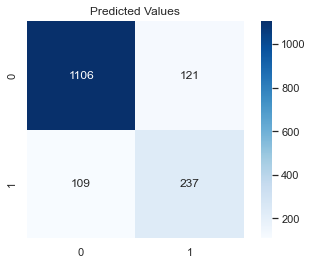

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=3)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()
     

## KNeighborsClassifier

In [103]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Reds',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [104]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.852511125238398 Maximum Random Number:- 34


accuracy_score:- 0.828353464717101
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1333
           1       0.46      0.65      0.54       240

    accuracy                           0.83      1573
   macro avg       0.69      0.76      0.72      1573
weighted avg       0.86      0.83      0.84      1573



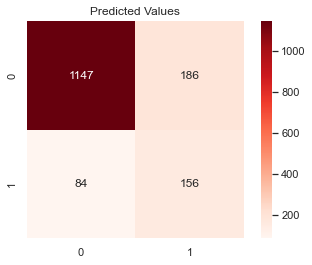

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=69)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()
     

## Support Vector Classifier

In [106]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='crest',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [107]:
maxacc=0
maxrn=0

for i in [1,2,11,22,33,44,55,66,77,88,99]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8474253019707565 Maximum Random Number:- 44


accuracy_score:- 0.8410680228862047
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1389
           1       0.40      0.70      0.51       184

    accuracy                           0.84      1573
   macro avg       0.68      0.78      0.71      1573
weighted avg       0.89      0.84      0.86      1573



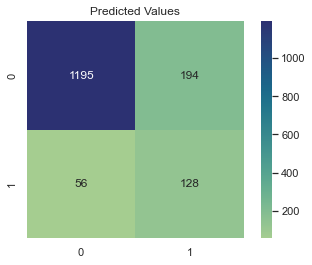

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

## Random Forest classifier

In [109]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='viridis',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [110]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.9097266369993643 Maximum Random Number:- 78


accuracy_score:- 0.8989192625556262
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1330
           1       0.62      0.88      0.73       243

    accuracy                           0.90      1573
   macro avg       0.80      0.89      0.83      1573
weighted avg       0.92      0.90      0.91      1573



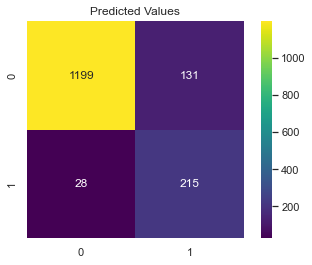

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

## Gradient Boosting Classifier

In [112]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='pink',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [113]:
maxacc=0
maxrn=0

for i in [11,22,33,44,55,66,77]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8512396694214877 Maximum Random Number:- 22


accuracy_score:- 0.8467895740623014
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1366
           1       0.45      0.70      0.54       207

    accuracy                           0.85      1573
   macro avg       0.70      0.78      0.73      1573
weighted avg       0.88      0.85      0.86      1573



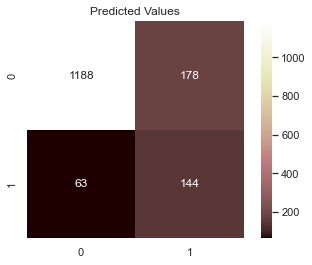

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

## Ada Boost Classifier

In [115]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='icefire',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [120]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8493324856961221 Maximum Random Number:- 24


accuracy_score:- 0.8359821996185632
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1363
           1       0.43      0.68      0.52       210

    accuracy                           0.84      1573
   macro avg       0.69      0.77      0.71      1573
weighted avg       0.88      0.84      0.85      1573



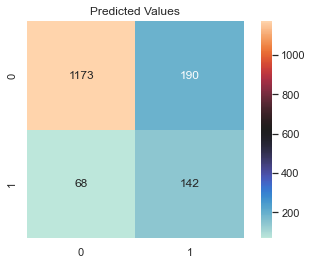

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=25)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()
     

## Cross Validation

In [122]:
for model in model_list:
    score=cross_val_score(model,x,y,cv=10)
    print(model)
    print(score)
    print(score.mean())
     

LogisticRegression()
[0.85641677 0.82951654 0.7913486  0.77480916 0.78117048 0.80279898
 0.82824427 0.82442748 0.86259542 0.85877863]
0.8210106339984028
GaussianNB()
[0.80813215 0.79898219 0.76717557 0.76081425 0.74045802 0.70101781
 0.71374046 0.80025445 0.84987277 0.84478372]
0.7785231384036393
DecisionTreeClassifier()
[0.77001271 0.72900763 0.66157761 0.86259542 0.96183206 1.
 0.95928753 0.79770992 0.78498728 0.78498728]
0.8311997439304732
KNeighborsClassifier()
[0.82592122 0.78880407 0.78117048 0.80152672 0.84605598 0.85114504
 0.85496183 0.80661578 0.8346056  0.84096692]
0.8231773637124908
SVC()
[0.86277001 0.84223919 0.82188295 0.8129771  0.83842239 0.81552163
 0.83587786 0.82442748 0.86132316 0.86005089]
0.8375492659016913
RandomForestClassifier()
[0.85514612 0.84096692 0.81170483 0.89058524 0.9821883  1.
 0.9821883  0.91857506 0.85368957 0.85750636]
0.8992550704676179
GradientBoostingClassifier()
[0.86404066 0.8307888  0.81933842 0.80279898 0.82824427 0.83587786
 0.84223919 0.8

## RandomForestClassifier is best model

accuracy_score:- 0.8995549904640814
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1327
           1       0.63      0.88      0.73       246

    accuracy                           0.90      1573
   macro avg       0.80      0.89      0.84      1573
weighted avg       0.92      0.90      0.91      1573



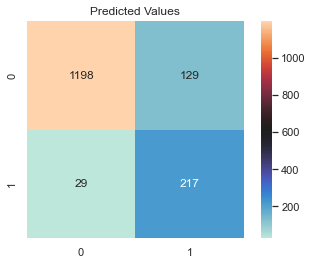

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

## Hyperparameters for a model

In [124]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [125]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8745229007633588
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.8807251908396947
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best score: RandomForestClassifier(criterion='entropy', max_features='log2')
Best score: 0.8834307844275555
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.8896310432569975
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')
Best score: 0.8867740059747512
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.8880407124681933
Best score: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(criterion='entropy', max_features='sqrt')
Best score: 0.8894748444473594
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClas

In [126]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=9)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8888371936258601
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')


##  ROC CURVE

In [127]:
pred_prob=rfc.predict_proba(x_test)

In [128]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=2
     

In [129]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

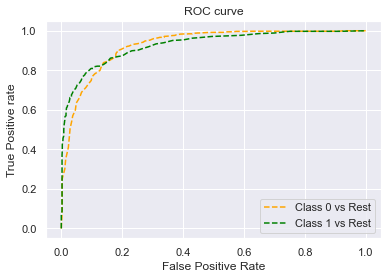

In [130]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC curve',dpi=300); 
     

## SAVE THE MODEL

In [131]:
import joblib
     

In [132]:
#save the model
joblib.dump(rfc,'Rainfall_Prediction_rfc.obj')

['Rainfall_Prediction_rfc.obj']

In [133]:
#load the model
loaded_model=joblib.load('Rainfall_Prediction_rfc.obj')
     

In [134]:
#check the model is working or not
loaded_model.predict(x_test)
     

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Design a predictive model to predict how much rainfall will be there

In [135]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1  8.000000   
1          22.0         44.0         25.0       1010.6       1007.8  4.566622   
2          26.0         38.0         30.0       1007.6       1008.7  4.566622   
3           9.0         45.0         16.0       1017.6       1012.8  4.566622   
4          20.0         82.0         33.0       1010.8       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm RainToday  RainTomorrow  
0  4.503183     16.9     21.8        No             0  
1  4.503183     17.2     24.3        No             0  
2  2.000000     21.0     23.2        No             0  
3  4.503183     18.1     26.5        No             0  
4  8.000000     17.8     29.7        No             0

## Apply Label Encoder

In [136]:
#independent variables
x=df.drop('Rainfall',axis=1)
#dependent variable(target variable)
y=df['Rainfall']

In [137]:
#apply label encoder of independent variables
x=x.apply(LabelEncoder().fit_transform)

In [138]:
df2=x

In [139]:
#add target variable
df2['Rainfall']=y
     

In [140]:
df2.head()

Date  Location  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  \
0     0         1      150      134           28        77           13   
1     1         1       89      157           28        77           14   
2     2         1      144      163           28        77           15   
3     3         1      107      186           28        77            4   
4     4         1      191      229           28        77           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             21          13          14            12            14   
1             21           6          15             2            13   
2             22          13          15            11            15   
3              9           9           0             6             5   
4             19           1           7             4            12   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           61           16           90          103         9         5   
1           33           19          119          110         5         5   
2           27           24           89          119         5         2   
3           34           10          189          160         5         5   
4           72           27          121           92         8         9   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Rainfall  
0      145      134          0             0       0.6  
1      148      160          0             0       0.0  
2      187      149          0             0       0.0  
3      158      182          0             0       0.0  
4      155      214          0             0       1.0

## Check the Outliers

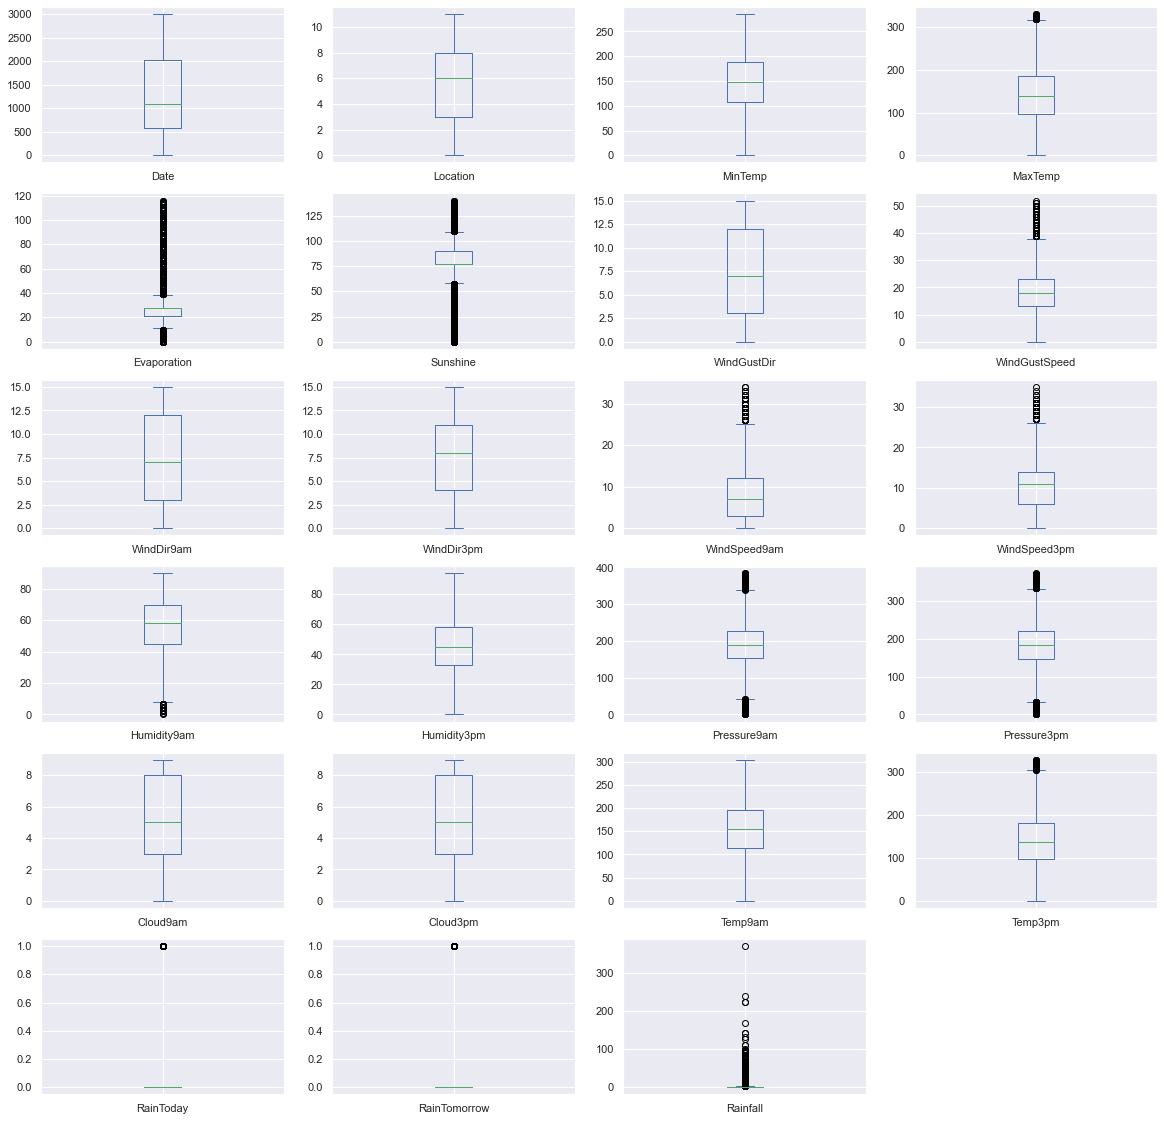

In [141]:
df2.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

In [142]:
#removing outliers
z=np.abs(zscore(df2))
     

In [143]:
threshold=3
print(np.where(z>3))

(array([  44,   52,   61,   62,   62,   67,   68,   68,  123,  267,  381,
        381,  431,  462,  563,  568,  568,  683,  699,  713,  770,  796,
        797,  802,  928,  935,  949,  979,  980,  980,  980, 1008, 1009,
       1011, 1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264,
       1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587,
       1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945,
       2016, 2028, 2043, 2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219,
       2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527, 2541, 2593,
       2676, 2677, 2735, 2827, 2835, 2841, 2849, 2849, 2855, 2863, 2869,
       2877, 2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911,
       2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003,
       3009, 3045, 3051, 3059, 3059, 3066, 3067, 3067, 3067, 3068, 3070,
       3082, 3082, 3082, 3089, 3089, 3099, 3099, 3101, 3141, 3143, 3150,
       3157, 3164, 3172, 3172, 3178, 3185, 3192, 3

In [148]:
#remove outliers
df_new=df2[(z<3).all(axis=1)]

In [149]:
#dataset shape after removing outliers
df_new.shape
     

(7992, 23)

In [150]:
df2=df_new

## Checking Skewness

In [151]:
#independent variables
x=df2.drop('Rainfall',axis=1)
#dependent variable
y=df2['Rainfall']

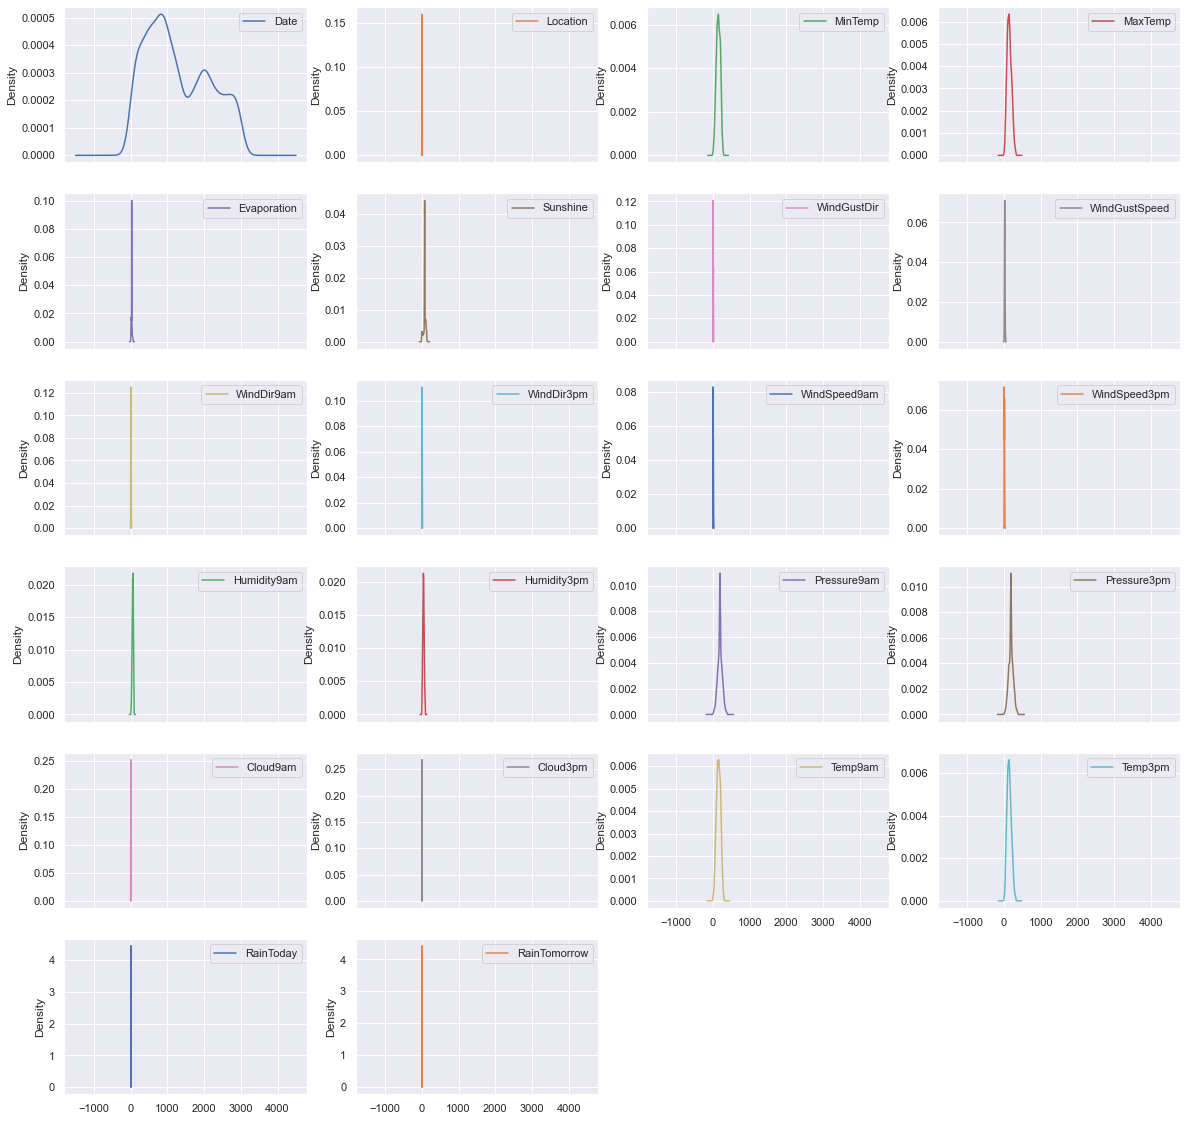

In [152]:
#check skewness using density plot
x.plot(kind='density',subplots=True,layout=(6,4),figsize=(20,20));
     

In [153]:
#checking skewness
x.skew().sort_values(ascending=False)

RainToday        1.302136
RainTomorrow     1.291967
WindSpeed9am     0.659841
Evaporation      0.502978
WindGustSpeed    0.491024
Date             0.400017
Temp3pm          0.342058
MaxTemp          0.325875
WindSpeed3pm     0.289687
WindDir9am       0.165621
Humidity3pm      0.117177
WindGustDir      0.109778
Pressure3pm      0.053477
Pressure9am      0.032808
Temp9am         -0.030221
Location        -0.038161
MinTemp         -0.075855
WindDir3pm      -0.127045
Humidity9am     -0.222803
Cloud3pm        -0.239722
Cloud9am        -0.305069
Sunshine        -0.724878
dtype: float64

In [154]:
#checking skewness
x.skew().sort_values(ascending=False)

RainToday        1.302136
RainTomorrow     1.291967
WindSpeed9am     0.659841
Evaporation      0.502978
WindGustSpeed    0.491024
Date             0.400017
Temp3pm          0.342058
MaxTemp          0.325875
WindSpeed3pm     0.289687
WindDir9am       0.165621
Humidity3pm      0.117177
WindGustDir      0.109778
Pressure3pm      0.053477
Pressure9am      0.032808
Temp9am         -0.030221
Location        -0.038161
MinTemp         -0.075855
WindDir3pm      -0.127045
Humidity9am     -0.222803
Cloud3pm        -0.239722
Cloud9am        -0.305069
Sunshine        -0.724878
dtype: float64

## Removing skewness

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [156]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [157]:
data=pipe.fit_transform(x)
     

In [158]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

## VIF(Variance Inflation Factor)

In [159]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif
     

In [160]:
vif()

Variables  VIF Factor
0            Date    1.415944
1        Location    1.500076
2         MinTemp    8.584194
3         MaxTemp   26.845733
4     Evaporation    1.580609
5        Sunshine    2.073151
6     WindGustDir    1.622749
7   WindGustSpeed    2.355350
8      WindDir9am    1.339588
9      WindDir3pm    1.491042
10   WindSpeed9am    2.006761
11   WindSpeed3pm    2.016803
12    Humidity9am    3.919954
13    Humidity3pm    5.446187
14    Pressure9am   20.632633
15    Pressure3pm   19.637997
16       Cloud9am    1.896267
17       Cloud3pm    1.792746
18        Temp9am   17.666930
19        Temp3pm   33.368984
20      RainToday    1.382606
21   RainTomorrow    1.433176

In [161]:
#Cloud9am and Cloud3pm are Same VIF Factor
x.drop('Cloud9am',axis=1,inplace=True)
#WindSpeed3pm and WindSpeed9am as same VIF Factor
x.drop('WindSpeed9am',axis=1,inplace=True)
#WindDir9am and WindDir3pm are same VIF Factor
x.drop('WindDir3pm',axis=1,inplace=True)
#Location and Date variables as same VIF Factor
x.drop('Location',axis=1,inplace=True)
#Evaporation and WindGustDir are Same vif Factor
x.drop('Evaporation',axis=1,inplace=True)

## Standard Scale

In [162]:
x=scale.fit_transform(x)
     

## Model Selection

In [163]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
     

In [164]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
lasso=Lasso()
ridge=Ridge()
     

In [168]:

list_models=[lr,dtr,knr,svr,rfr,gbr,abr,lasso,ridge]

## LinearRegression

In [169]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.5053857145001441 Random Number: 25


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=25)
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
pred=lr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.5053857145001441
mean_absolute_error: 1.6969280213509754
mean_squared_error: 12.334179021805863
r2_score: -0.10873233220638134


## DecisionTreeRegressor

In [171]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 1.0 Random Number: 1


In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))
     

1.0
mean_absolute_error: 1.2625772240458986
mean_squared_error: 14.731921973914826
mean_squared_log_error: 0.21345097540179286
r2_score: 0.33072131559786966


## KNeighborsRegressor

In [173]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)
     

Maximum score: 0.6778386738947306 Random Number: 74


In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.6778386738947306
mean_absolute_error: 1.4977566603813093
mean_squared_error: 13.493596969969982
mean_squared_log_error: 0.2071435218943434
r2_score: 0.04446729780829339


## Support Vector Regressor

In [175]:
maxscore=0
maxrn=0
for i in [22,33,44,55]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)
     

Maximum score: 0.47129696345153327 Random Number: 22


In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=22)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred=svr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.47129696345153327
mean_absolute_error: 1.3518855573397404
mean_squared_error: 13.210502477875524
r2_score: -1.2382689452529694


## RandomForestRegressor

In [177]:
maxscore=0
maxrn=0
for i in [11,22,33,44,55]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)

Maximum score: 0.9487556691499539 Random Number: 55


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=33)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))
     

0.9470445585577496
mean_absolute_error: 1.2098260493498196
mean_squared_error: 9.088516245438463
mean_squared_log_error: 0.14738322465326553
r2_score: 0.3955797207974664


## GradientBoostingRegressor

In [179]:
maxscore=0
maxrn=0
for i in [10,20,30,40]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)
     

Maximum score: 0.6618588182346202 Random Number: 10


In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
pred=gbr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.6618588182346202
mean_absolute_error: 1.4296398353523214
mean_squared_error: 10.958792222375887
r2_score: 0.10112112532402295


## AdaBoostRegressor

In [181]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)
     

Maximum score: 0.48116175060932453 Random Number: 14


In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=65)
abr.fit(x_train,y_train)
print(abr.score(x_train,y_train))
pred=abr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.4287687202952253
mean_absolute_error: 1.6781782677938406
mean_squared_error: 13.599918173860436
mean_squared_log_error: 0.24221397216046017
r2_score: 0.3714963315919554


## Lasso Regressor

In [183]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)
     

Maximum score: 0.24585729629581232 Random Number: 39


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)
lasso.fit(x_train,y_train)
print(lasso.score(x_train,y_train))
pred=lasso.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))
     

0.24585729629581232
mean_absolute_error: 2.1340406880822607
mean_squared_error: 14.43691341661339
mean_squared_log_error: 0.7010067385198243
r2_score: -13.437102919541031


## Ridge Regressor

In [185]:
maxscore=0
maxrn=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('Maximum score:',maxscore,'Random Number:',maxrn)
     

Maximum score: 0.5052951739219662 Random Number: 25


In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=25)
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
pred=ridge.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.5052951739219662
mean_absolute_error: 1.688509561296272
mean_squared_error: 12.328749197679931
r2_score: -0.11333496821230082


## Cross Validation

In [187]:
for model in list_models:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())
     

LinearRegression()
[0.51084589 0.45957554 0.46755804 0.4350843  0.53338386]
0.48128952592277063
DecisionTreeRegressor()
[-0.10875076  0.32665879  0.3777409   0.35428551  0.10122242]
0.2102313723083487
KNeighborsRegressor()
[0.37292918 0.46165314 0.49754472 0.3903654  0.41421841]
0.42734216816266557
SVR()
[0.459093   0.43927831 0.41987557 0.3962401  0.46488579]
0.4358745527630498
RandomForestRegressor()
[0.48045057 0.56103795 0.68520809 0.56284506 0.57121432]
0.5721511977970442
GradientBoostingRegressor()
[0.48638812 0.51431512 0.56617568 0.4858567  0.5421527 ]
0.5189776648478015
AdaBoostRegressor()
[0.35453631 0.40259223 0.40408938 0.34849591 0.50271622]
0.40248600945737784
Lasso()
[0.23585267 0.21893534 0.19540318 0.21719565 0.22699846]
0.2188770605585265
Ridge()
[0.51068975 0.46143446 0.46697452 0.43646609 0.53277022]
0.4816670108000906


## RandomForestRegressor is best Model

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=52)
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('mean_squared_log_error:',mean_squared_log_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

0.9478334202923161
mean_absolute_error: 1.1516923472166534
mean_squared_error: 8.395047691290877
mean_squared_log_error: 0.13851333842543773
r2_score: 0.4003995316912262


In [189]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2']}
     

In [190]:
rfr_grid = GridSearchCV(rfr, random_forest_params, cv=5)
rfr_grid.fit(x_train,y_train)
print('Best score:', rfr_grid.best_score_)
print('Best score:', rfr_grid.best_params_)
print('Best score:', rfr_grid.best_estimator_)

Best score: 0.5961553416218605
Best score: {'max_features': 'log2'}
Best score: RandomForestRegressor(max_features='log2')


## Save the Model

In [191]:
#save the model
joblib.dump(rfr,'rainfall_prediction_rfr.obj')

['rainfall_prediction_rfr.obj']

In [192]:
#load the model
loaded_model=joblib.load('rainfall_prediction_rfr.obj')
     

In [193]:
#check the model is working or not
loaded_model.predict(x_test)

array([ 0.28641393,  9.047     ,  0.08811827, ..., 11.434     ,
        0.3331774 ,  0.09111827])